In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

In [30]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [31]:
housing = housing.loc[:, ['median_income', 'median_house_value']]

In [32]:
house_value_max = housing['median_house_value'].max() # 500,001
mask = housing['median_house_value'] >= house_value_max
housing = housing[~mask]

In [33]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing


,median_income,median_house_value,income_cat
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
20635,1.5603,78100.0,2
20636,2.5568,77100.0,2
20637,1.7000,92300.0,2
20638,1.8672,84700.0,2


In [34]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)
stratification

In [35]:
for name, group in stratification:
    print(f"그룹 {name}")
    print("---")
    print(group)
    print()
    if name == 2:
        break

그룹 1
---
       median_income  median_house_value income_cat
20            1.3578            147500.0          1
33            1.3750            104900.0          1
35            1.4861             97200.0          1
36            1.0972            104500.0          1
37            1.4103            103900.0          1
...              ...                 ...        ...
20603         1.3375             59600.0          1
20610         1.3631             45500.0          1
20611         1.2857             47000.0          1
20612         1.4934             48300.0          1
20613         1.4958             53400.0          1

[814 rows x 3 columns]

그룹 2
---
       median_income  median_house_value income_cat
8             2.0804            226700.0          2
13            2.6736            191300.0          2
14            1.9167            159200.0          2
15            2.1250            140000.0          2
16            2.7750            152500.0          2
...              ... 

In [36]:
stratification.count()

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


In [37]:
stratification.sum()

,median_income,median_house_value
income_cat,,
1,988.6214,8.816690e+07
2,15234.0468,8.840968e+08
3,26161.8582,1.377902e+09
4,17960.4249,8.714170e+08
5,11994.4543,5.654208e+08


In [38]:
stratification.mean()

,median_income,median_house_value
income_cat,,
1,1.214523,108313.143735
2,2.325099,134935.408730
3,3.683212,193988.680698
4,5.128619,248834.094803
5,7.038999,331819.718310


In [39]:
stratification.var()

,median_income,median_house_value
income_cat,,
1,0.054581,4.804504e+09
2,0.165363,4.761235e+09
3,0.182003,6.655794e+09
4,0.168119,6.495770e+09
5,1.146047,6.486068e+09


In [40]:
stratification.std()

,median_income,median_house_value
income_cat,,
1,0.233626,69314.530601
2,0.406648,69001.703453
3,0.426619,81583.050538
4,0.410023,80596.339192
5,1.070536,80536.125453


In [42]:
stratification_sampling = stratification.apply(lambda y:y.sample(frac=0.1, random_state = 42), include_groups=False)
stratification_sampling

median_income  median_house_value
income_cat                                         
1          4483          1.1868             93800.0
           13900         1.3811             51300.0
           3290          1.1650             53300.0
           4874          0.9234            187500.0
           12798         1.4861             63100.0
...                         ...                 ...
5          10155        13.1107            467600.0
           20392         6.0145            287100.0
           6065          7.0329            368300.0
           16434         6.4562            230000.0
           1554          8.1550            343700.0

[1966 rows x 2 columns]

In [45]:
stratification_sampling = stratification_sampling.reset_index(level=0)
stratification_sampling

,income_cat,median_income,median_house_value
4483,1,1.1868,93800.0
13900,1,1.3811,51300.0
3290,1,1.1650,53300.0
4874,1,0.9234,187500.0
12798,1,1.4861,63100.0
...,...,...,...
10155,5,13.1107,467600.0
20392,5,6.0145,287100.0
6065,5,7.0329,368300.0
16434,5,6.4562,230000.0


In [48]:
stratification_sampling = stratification_sampling[['median_income','median_house_value','income_cat']]
stratification_sampling

,median_income,median_house_value,income_cat
4483,1.1868,93800.0,1
13900,1.3811,51300.0,1
3290,1.1650,53300.0,1
4874,0.9234,187500.0,1
12798,1.4861,63100.0,1
...,...,...,...
10155,13.1107,467600.0,5
20392,6.0145,287100.0,5
6065,7.0329,368300.0,5
16434,6.4562,230000.0,5


In [51]:
stratification_sampling_count = stratification_sampling.groupby('income_cat',observed=False).count()
stratification_sampling_count

,median_income,median_house_value
income_cat,,
1,81,81
2,655,655
3,710,710
4,350,350
5,170,170


In [52]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


In [53]:
random_sampling = housing.sample(frac=0.1, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
15065,1.8357,104200.0,2
14534,4.2109,171200.0,3
13570,4.0481,97300.0,3
2607,3.5380,102700.0,3
12750,2.2000,116500.0,2
...,...,...,...
20333,6.6246,284200.0,5
487,2.9405,289500.0,2
5140,1.6027,97300.0,2
979,5.5000,247200.0,4


In [56]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,87,87
2,644,644
3,702,702
4,347,347
5,188,188


In [ ]:
random_total = random_sampling_count.sum()
random_total

median_income         1968
median_house_value    1968
dtype: int64

In [63]:
stratified_total = stratification_sampling_count.sum()
stratified_total

median_income         1966
median_house_value    1966
dtype: int64

In [64]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.044207,0.044207
2,0.327236,0.327236
3,0.356707,0.356707
4,0.176321,0.176321
5,0.095528,0.095528


In [66]:
stratified_sampling_ratio = stratification_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.041200,0.041200
2,0.333164,0.333164
3,0.361139,0.361139
4,0.178026,0.178026
5,0.086470,0.086470


In [69]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


In [77]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]],
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:,[1]]],
                         axis=1)
proportions.columns = ['전체','층화표집','무작위 추출']
proportions.index.name = '소득구간'
proportions

,전체,층화표집,무작위 추출
소득구간,,,
1,0.041372,0.041200,0.044207
2,0.333011,0.333164,0.327236
3,0.361017,0.361139,0.356707
4,0.177992,0.178026,0.176321
5,0.086607,0.086470,0.095528


In [80]:
proportions['층화추출 오차율'] = proportions['층화표집'] / proportions["전체"] - 1
proportions['무작위 추출 오차율'] = proportions['무작위 추출'] / proportions['전체'] - 1
proportions

,전체,층화표집,무작위 추출,층화추출 오차율,무작위 추출 오차율
소득구간,,,,,
1,0.041372,0.041200,0.044207,-0.004155,0.068525
2,0.333011,0.333164,0.327236,0.000457,-0.017344
3,0.361017,0.361139,0.356707,0.000340,-0.011936
4,0.177992,0.178026,0.176321,0.000191,-0.009389
5,0.086607,0.086470,0.095528,-0.001586,0.103006


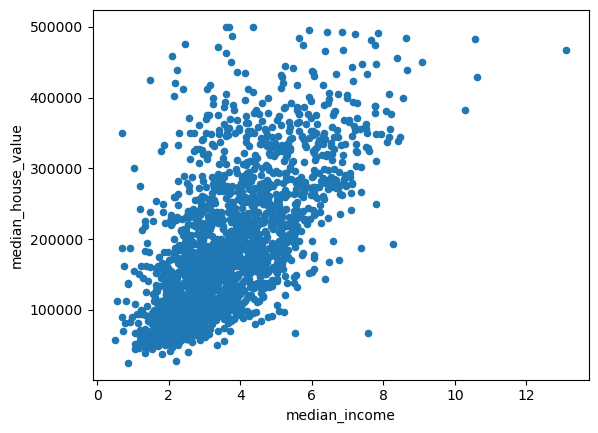

In [82]:
stratification_sampling.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

In [85]:
stratification_sampling.iloc[:, :2].var()

median_income         2.388555e+00
median_house_value    9.339549e+09
dtype: float64

In [88]:
random_sampling.iloc[:, :2].var()

median_income         2.535877e+00
median_house_value    1.027417e+10
dtype: float64

In [89]:
stratification_sampling.iloc[:, :2].var(ddof=0)


median_income         2.387340e+00
median_house_value    9.334799e+09
dtype: float64

In [90]:
random_sampling.iloc[:, :2].var(ddof=0)

median_income         2.534588e+00
median_house_value    1.026895e+10
dtype: float64

In [91]:
housing.iloc[:, :2].var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64